### Import Modules 

In [27]:
import pandas as pd
import tensorflow as tf
from tensorflow.python.client import device_lib
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
tf.config.list_physical_devices('GPU')

In [8]:
from PIL import Image
import pandas as pd
import os
import random
import yaml
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import torch
torch.cuda.is_available()

True

### Data Augmentation

We shall use data augmentation to create 1000 images from our original dataset of 100 images. \
We do this by allowing images to be rotated up to 20 degress, horizontal shifting up to 0.2 of image width, horizontal & vertical flips. \
Finally, we save these images to a folder named 'image_dataset_augment'

In [25]:
datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

for i in os.listdir('image_dataset')[1:]:
    img = load_img('image_dataset/'+i)  
    x = img_to_array(img)  
    x = x.reshape((1,) + x.shape) 
    cnt = 1
    for batch in datagen.flow(x, batch_size=1, save_to_dir='image_dataset_augment', save_prefix=i[:-4].split('_')[-1], save_format='jpeg'):
        cnt += 1
        if cnt > 10:
            break  

### Model Training 

Before proceeding with model training, kindly ensure that all files are in their respective folders

Sample code for yolov5 model re-training on custom dataset

In [ ]:
python yolov5/train.py --img 640 --cfg yolov5/models/yolov5s.yaml --hyp yolov5/data/hyps/hyp.scratch.yaml --batch 32 --epochs 5 --data sagirac_dataset/sagirac_data.yaml --weights yolov5/weights/yolov5s.pt --workers 0 --name yolov5/sagirac_data_det

Sample code for making predictions on test dataset

In [ ]:
python yolov5/detect.py --source sagirac_dataset/images/test/ --weights yolov5\runs\train\yolov5\sagirac_data_det5\weights\last.pt --conf 0.25 --name yolov5\runs\train\yolov5\sagirac_data_det5

Random pick 1 image & show it's model prediction. \
As we can see, model successfully draws bounding box for target. 

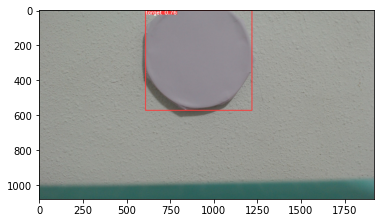

In [16]:
detections_dir = "C:\\Users\\resce\\Documents\\Jupyter Notebooks\\yolov5\\runs\\detect\\yolov5\\runs\\train\\yolov5\\sagirac_data_det5"
detection_images = [os.path.join(detections_dir, x) for x in os.listdir(detections_dir)]

random_detection_image = Image.open(random.choice(detection_images))
plt.imshow(np.array(random_detection_image))